In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
result_df = joblib.load("result_df")

In [3]:
result_df[result_df["Evaluation Metric"] == "Windowed F-Score"]

,Anomaly Detection Method,Characteristic,Evaluation Metric,Metric Score,Metric Score Upper,Metric Score Lower
2,anomalous,seasonality,Windowed F-Score,0.381778,0.442665,0.320890
6,anomalous,trend,Windowed F-Score,0.465000,0.532438,0.397562
10,anomalous,conceptdrift,Windowed F-Score,0.274670,0.325116,0.224225
14,anomalous,missing,Windowed F-Score,0.371726,0.430182,0.313270
18,fb,seasonality,Windowed F-Score,0.289090,0.316149,0.262031
22,fb,trend,Windowed F-Score,0.334416,0.370148,0.298684
26,fb,conceptdrift,Windowed F-Score,0.365463,0.398539,0.332388
30,fb,missing,Windowed F-Score,0.363934,0.395275,0.332592
34,glim,seasonality,Windowed F-Score,0.384374,0.422403,0.346345
38,glim,trend,Windowed F-Score,0.356638,0.393079,0.320198


## Seasonality

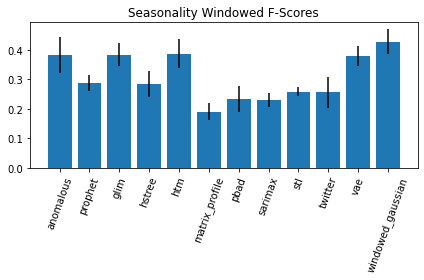

In [4]:
seasonality = result_df[(result_df["Evaluation Metric"] == "Windowed F-Score") & (result_df["Characteristic"]=="seasonality")]
ci = []
for x,y in zip(seasonality["Metric Score Upper"].values, seasonality["Metric Score Lower"].values):
    ci.append((y,x))
    
# get the range of the confidence interval
y_r = [seasonality["Metric Score"].values[i] - ci[i][1] for i in range(len(ci))]

the_labels = []
for label in seasonality["Anomaly Detection Method"].values:
    if label == "fb":
        the_labels.append("prophet")
    else:
        the_labels.append(label)
        
plt.figure()
plt.bar(range(seasonality.shape[0]), seasonality["Metric Score"].values,yerr=y_r)
plt.xticks(range(seasonality.shape[0]), the_labels)
plt.xticks(rotation=70)
plt.title("Seasonality Windowed F-Scores")
plt.tight_layout()
plt.savefig("seasonality_f.eps",format="eps")
# plt.show()

In [5]:
seasonality["Rank"] = seasonality["Metric Score"].rank(ascending=False) 
seasonality[["Anomaly Detection Method", "Rank"]]

/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Anomaly Detection Method,Rank
2,anomalous,4.0
18,fb,6.0
34,glim,3.0
50,hstree,7.0
66,htm,2.0
82,matrix_profile,12.0
98,pbad,10.0
114,sarimax,11.0
130,stl,8.0
146,twitter,9.0


## Trend

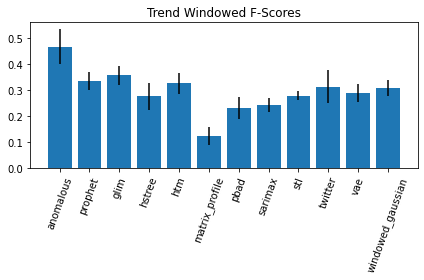

In [6]:
trend = result_df[(result_df["Evaluation Metric"] == "Windowed F-Score") & (result_df["Characteristic"]=="trend")]
ci = []
for x,y in zip(trend["Metric Score Upper"].values, trend["Metric Score Lower"].values):
    ci.append((y,x))

# get the range of the confidence interval
y_r = [trend["Metric Score"].values[i] - ci[i][1] for i in range(len(ci))]

the_labels = []
for label in trend["Anomaly Detection Method"].values:
    if label == "fb":
        the_labels.append("prophet")
    else:
        the_labels.append(label)
        
plt.figure()
plt.bar(range(trend.shape[0]), trend["Metric Score"].values,yerr=y_r)
plt.xticks(range(trend.shape[0]), the_labels)
plt.xticks(rotation=70)
plt.title("Trend Windowed F-Scores")
plt.tight_layout()
plt.savefig("trend_f.eps",format="eps")
# plt.show()

In [7]:
trend["Rank"] = trend["Metric Score"].rank(ascending=False) 
trend[["Anomaly Detection Method", "Rank"]]

/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Anomaly Detection Method,Rank
6,anomalous,1.0
22,fb,3.0
38,glim,2.0
54,hstree,9.0
70,htm,4.0
86,matrix_profile,12.0
102,pbad,11.0
118,sarimax,10.0
134,stl,8.0
150,twitter,5.0


## Concept Drift

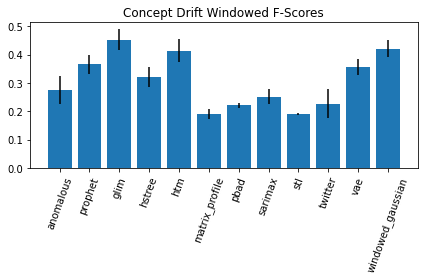

In [8]:
conceptdrift = result_df[(result_df["Evaluation Metric"] == "Windowed F-Score") & (result_df["Characteristic"]=="conceptdrift")]
ci = []
for x,y in zip(conceptdrift["Metric Score Upper"].values, conceptdrift["Metric Score Lower"].values):
    ci.append((y,x))

# get the range of the confidence interval
y_r = [conceptdrift["Metric Score"].values[i] - ci[i][1] for i in range(len(ci))]

the_labels = []
for label in conceptdrift["Anomaly Detection Method"].values:
    if label == "fb":
        the_labels.append("prophet")
    else:
        the_labels.append(label)
        
plt.figure()
plt.bar(range(conceptdrift.shape[0]), conceptdrift["Metric Score"].values,yerr=y_r)
plt.xticks(range(conceptdrift.shape[0]), the_labels)
plt.xticks(rotation=70)
plt.title("Concept Drift Windowed F-Scores")
plt.tight_layout()
plt.savefig("cd_f.eps",format="eps")
# plt.show()

In [9]:
conceptdrift["Rank"] = conceptdrift["Metric Score"].rank(ascending=False) 
conceptdrift[["Anomaly Detection Method", "Rank"]]

/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Anomaly Detection Method,Rank
10,anomalous,7.0
26,fb,4.0
42,glim,1.0
58,hstree,6.0
74,htm,3.0
90,matrix_profile,12.0
106,pbad,10.0
122,sarimax,8.0
138,stl,11.0
154,twitter,9.0


## Missing

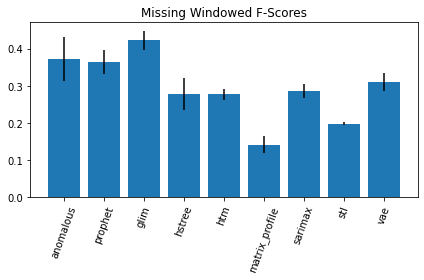

In [10]:
missing = result_df[(result_df["Evaluation Metric"] == "Windowed F-Score") & (result_df["Characteristic"]=="missing")]

# remove rows with windowed_gaussian, twitter, pbad
a = ["windowed_gaussian", "twitter", "pbad"]
missing_new = missing[~missing["Anomaly Detection Method"].isin(a)]

ci = []
for x,y in zip(missing_new["Metric Score Upper"].values, missing_new["Metric Score Lower"].values):
    ci.append((y,x))

# get the range of the confidence interval
y_r = [missing_new["Metric Score"].values[i] - ci[i][1] for i in range(len(ci))]

the_labels = []
for label in missing_new["Anomaly Detection Method"].values:
    if label == "fb":
        the_labels.append("prophet")
    else:
        the_labels.append(label)
        
plt.figure()
plt.bar(range(missing_new.shape[0]), missing_new["Metric Score"].values,yerr=y_r)
plt.xticks(range(missing_new.shape[0]), the_labels)
plt.xticks(rotation=70)
plt.title("Missing Windowed F-Scores")
plt.tight_layout()
plt.savefig("missing_f.eps",format="eps")
# plt.show()

In [12]:
missing_new["Rank"] = missing_new["Metric Score"].rank(ascending=False) 
missing_new[["Anomaly Detection Method", "Rank"]]

/home/cfreeman/Documents/NextIT/jair_work/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Anomaly Detection Method,Rank
14,anomalous,2.0
30,fb,3.0
46,glim,1.0
62,hstree,6.0
78,htm,7.0
94,matrix_profile,9.0
126,sarimax,5.0
142,stl,8.0
174,vae,4.0
